##Importación de librerias

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import get_scorer_names


##Abriendo el drive para buscar la base de datos a utilizar

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Data Science/Curso de Data Science/Base de datos 1er Entrega/

/content/drive/MyDrive/Data Science/Curso de Data Science/Base de datos 1er Entrega


In [5]:
%ls

 atp_tennis.csv
 atp_tennis.gsheet
 BigML_Dataset_5f50a4cc0d052e40e6000034.csv
 BigML_Dataset_5f50a4cc0d052e40e6000034.gsheet
'Hawaii 15224_19.65_-155.54_1998 dataset.csv'
'Hawaii 15224_19.65_-155.54_1998 dataset.gsheet'


##Data set utilizado BigML_Dataset_5f50a4cc0d052e40e6000034.csv

In [6]:
#Lectura del dataset
df_irr = pd.read_csv("BigML_Dataset_5f50a4cc0d052e40e6000034.csv")
df_irr

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,True,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,True,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,243,2009,8,31,19,True,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


Creamos otra variable para no modificar el data frame original y poder ir comparando si es necesario

In [7]:
df_mod = df_irr

##Convierto la columna 'Is Daylight' en numerica para tener todo el data frame numerico y poder trabajarlo
##False pasa a ser 0 y True pasa a ser 1

In [8]:
df_mod['Is Daylight'] = df_mod['Is Daylight'].replace(False, 0).replace(True, 1)
df_mod

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,0,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,1,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,1,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,1,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,243,2009,8,31,10,1,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,1,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,1,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,243,2009,8,31,19,1,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


##Elimino las filas con valor cero en la columna 'Power Generated', ya que las filas con valor 0 en dicha columna son demasiados como para sustituirlos por un valor medio.

In [9]:
df_mod_nonzeros = df_mod[df_mod['Power Generated'] != 0]
df_mod_nonzeros

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
2,245,2008,9,1,7,1,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,1,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,1,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
5,245,2008,9,1,16,1,0.296915,69,28,7.5,0,10.0,20,23.0,29.85,16280
6,245,2008,9,1,19,1,0.528278,69,28,7.5,0,10.0,36,15.0,29.83,515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,243,2009,8,31,7,1,0.396927,63,27,13.9,4,10.0,87,9.0,29.90,464
2915,243,2009,8,31,10,1,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,1,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,1,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257


##Verifico que no haya NaN en el dataset

In [10]:
#Utilizo el metodo isnull para que busque todos los valores nulos y luego el metodo sum para que sume todos los que encuentra para cada columna#
df_mod_nonzeros.isnull().sum()

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             1
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

#Como la columna Average Wind Speed (Period) tiene un valor nulo o NaN, voy a pasar a elimnar los valores NaN utilizando dropna()

In [11]:
df_NaN = df_mod_nonzeros.dropna()
df_NaN

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
2,245,2008,9,1,7,1,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,1,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,1,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
5,245,2008,9,1,16,1,0.296915,69,28,7.5,0,10.0,20,23.0,29.85,16280
6,245,2008,9,1,19,1,0.528278,69,28,7.5,0,10.0,36,15.0,29.83,515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,243,2009,8,31,7,1,0.396927,63,27,13.9,4,10.0,87,9.0,29.90,464
2915,243,2009,8,31,10,1,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,1,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,1,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257


#Verificamos nuevamente que no haya quedado ningun valor nulo

In [12]:
#Utilizo el metodo isnull para que busque todos los valores nulos y luego el metodo sum para que sume todos los que encuentra para cada columna#
df_NaN.isnull().sum()

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             0
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

#Ahora la base de datos quedó limpia de valores ceros o NaN que no sean utiles.

#Luego comenzamos con la creación de graficos para una mejor visualización de la información y de este modo poder observar caracteristicas que no son tan sencillas de encontrar.

#Sección 1.
##Primero vamos a verificar que los datos del data set sean coherentes con la distribución que normalmente se debería observar.
##En estos dos primeros graficos deberiamos observar una tendencia normal.

##Grafico 1
####En este gráfico podemos observar como varía la potencia generada a lo largo del año.
####Esto nos permite ver como durante los meses de verano (hemisferio norte) se genera mas potencia que durante los meses de invierno.

In [13]:

#Creamos Data Frame de la potencia acumulada para cada mes#
#potAc se lo usa en varios de los gráficos#
potAc = df_NaN.groupby("Month").agg({"Power Generated": "sum"})

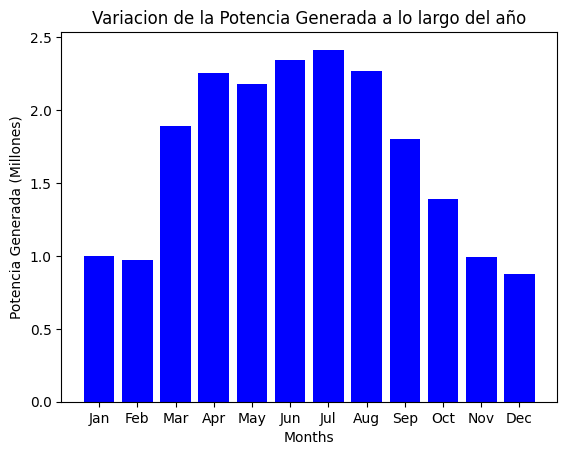

In [14]:
#Creamos nombreMeses para que al graficar se pueda ver mejor los nombres de cada mes#
nombreMeses = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
fig, ax = plt.subplots()
ax.bar(nombreMeses, potAc["Power Generated"]/1000000, color = "blue")#divido para que en el grafico aparezca mas leible
plt.title("Variacion de la Potencia Generada a lo largo del año")
plt.xlabel("Months")
plt.ylabel("Potencia Generada (Millones)")
plt.show()

##Gráfico 2
####Gráfico de la distancia solar a lo largo del año.
####Este gráfico nos deja observar como la distancia al mediodia solar va disminuyendo a medida que se acerca al verano (hemisferio norte). Lo cual nos permite validar la coherencia de los datos obtenidos.

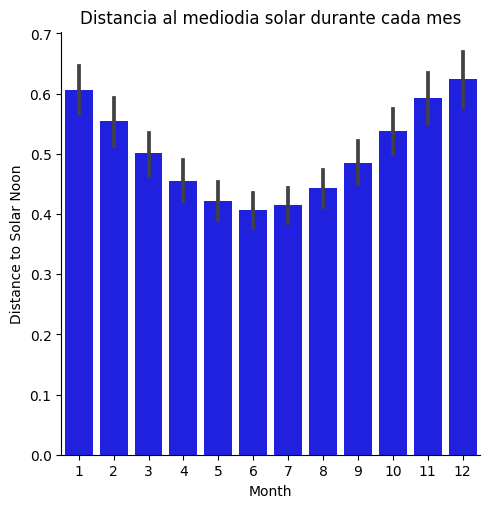

In [15]:
#Utilizo df_irr (data set sin modificar) para verificar bien la coherencia de los datos tomados"#
sns.catplot(data = df_irr, x="Month", y = "Distance to Solar Noon", kind = "bar", color= "blue").set(title="Distancia al mediodia solar durante cada mes")

##Gráfico 3
####Variación de la nubocidad en el tiempo.
####Permite ver si hay una tendencia de la nubocidad a medida en cada etapa del año.
####Se puede observar que no hay una tendencia visible en el grafico, habría que analizar y comparar mas años para evaluar si hay una tendencia anual de la nubosidad.

In [16]:
#Creamos Data Frame del promedio de la covertura del cielo agrupada por el mes#
acumSky = df_irr.groupby("Month").agg({"Sky Cover":"mean"}).reset_index()

[Text(0.5, 1.0, 'Promedio de la covertura del cielo a lo largo del año')]

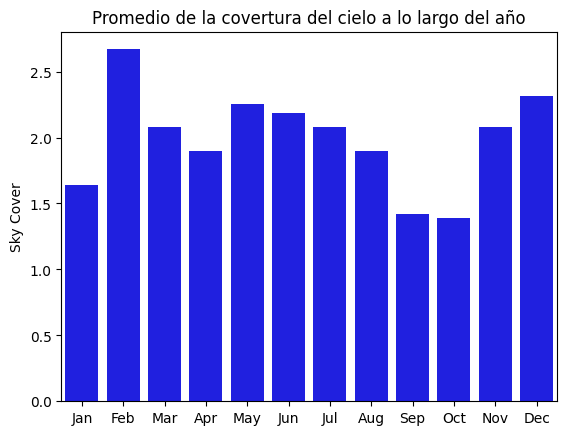

In [17]:
sns.barplot(data = df_irr, x = nombreMeses, y = acumSky["Sky Cover"], color = "blue").set(title="Promedio de la covertura del cielo a lo largo del año")

##Gráfico 4
####En este gráfico se observan 4 comportamientos diferentes para cada variable a lo largo del año.
####Esto nos permite evaluar como varia cada una en relacion a las otras.

####Defino las diferentes variables para cada parametro que se va a graficar despues

In [18]:
tempProm = df_NaN.groupby("Month").agg({"Average Temperature (Day)": "mean"})

In [19]:
visProm = df_NaN.groupby("Month").agg({"Visibility": "mean"})

In [20]:
humProm = df_NaN.groupby("Month").agg({"Relative Humidity": "mean"})

In [21]:
presProm = df_NaN.groupby("Month").agg({"Average Barometric Pressure (Period)": "mean"})

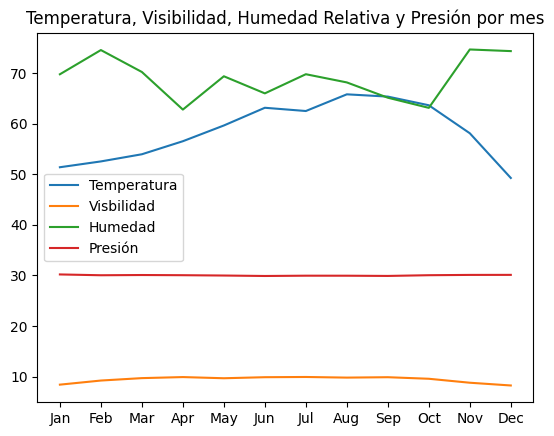

In [22]:
fig, ax = plt.subplots()
ax.plot(nombreMeses, tempProm["Average Temperature (Day)"], label = "Temperatura")
ax.plot(nombreMeses, visProm["Visibility"], label = "Visbilidad")
ax.plot(nombreMeses, humProm["Relative Humidity"], label = "Humedad")
ax.plot(nombreMeses, presProm["Average Barometric Pressure (Period)"], label = "Presión")
plt.title("Temperatura, Visibilidad, Humedad Relativa y Presión por mes")
plt.legend()
plt.show()

#Sección 2.
##Contuniamos analizando la velocidad del viento y la temperatura en relación a la potencia generada.

##Gráfico 5
####Relacion entre la potencia generada y la velocidad del viento promedio.
####Nos permite observar como no hay relación entre ambos parametros ya que se encuentran picos que no son coherentes.

In [23]:
acumWind = df_irr.groupby("Month").agg({"Average Wind Speed (Day)":"mean"}).reset_index()

Text(0.5, 0, 'Average Wind Speed')

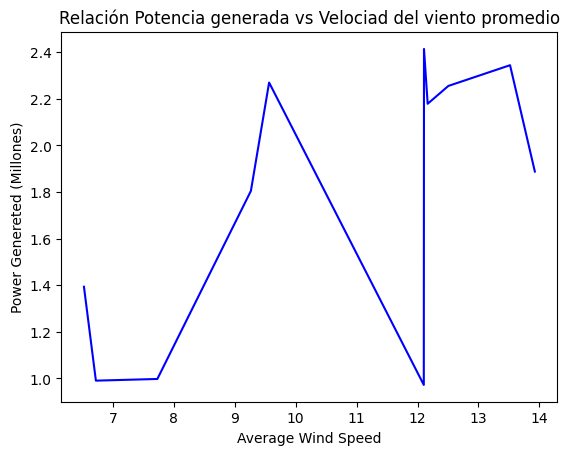

In [24]:
sns.lineplot(data = df_irr, x=acumWind['Average Wind Speed (Day)'], y= potAc['Power Generated']/1000000, color = "blue").set(title="Relación Potencia generada vs Velociad del viento promedio")
plt.ylabel("Power Genereted (Millones)")
plt.xlabel("Average Wind Speed")

##Gráfico 6
####Potencia generada promedio vs Temperatura promedio.
####En este gráfico se puede ver que hay una tendencia de crecimiento de la potencia a medida que aumenta la temperatura, sin embargo se observan unos picos negativos los cuales se deben analizar.

Text(0.5, 0, 'Average Temperature')

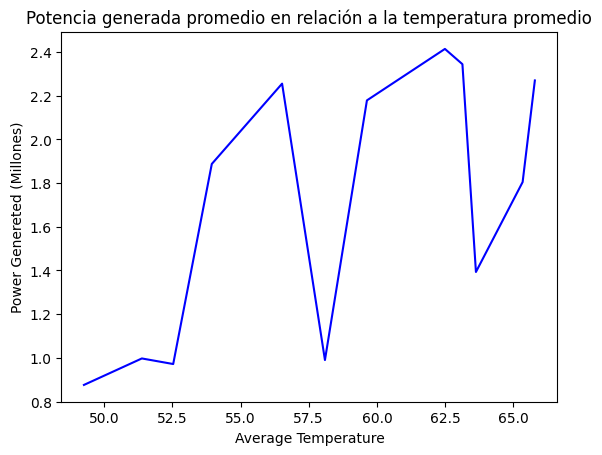

In [25]:
#graficar la temperatura en relacion a la potencia#
sns.lineplot(data = df_irr, x=tempProm["Average Temperature (Day)"], y= potAc['Power Generated']/1000000, color = "blue").set(title="Potencia generada promedio en relación a la temperatura promedio")
plt.ylabel("Power Genereted (Millones)")
plt.xlabel("Average Temperature")

#Sección 3.
##Luego graficamos la relacion de la nubosidad con la potencia generada

##Gráfico 7
####Grafico del comportamiento de las nubes durante el dia y la noche.
####Permite observar que tan cubierto se encuentra el cielo en cada primera hora de los periodos y al mismo tiempo poder observar como varia siendo de dia y de noche.

In [26]:
#Modificacion de la columna "Is Daylight" para que aparezca como "Day" y "Night"#
df_cloud = df_irr
df_cloud["Is Daylight"] = df_cloud["Is Daylight"].apply(lambda x: "Day" if x else "Night")

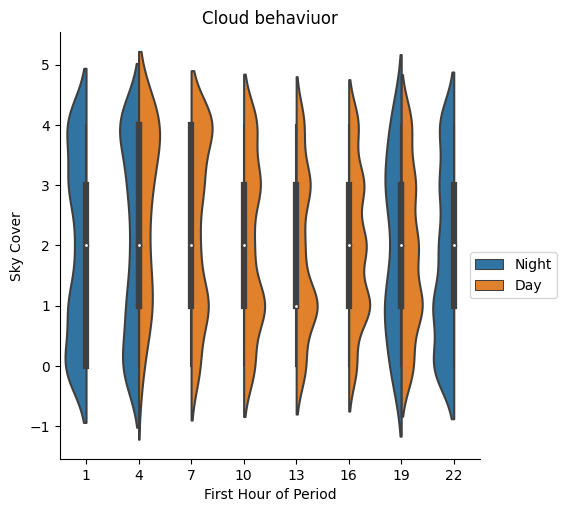

In [27]:
sns.catplot(data=df_cloud, kind="violin", x="First Hour of Period", y="Sky Cover", hue="Is Daylight", split=True, legend=False).set(title="Cloud behaviuor")
legend = plt.legend(title='Título de la Leyenda')
legend.set_title('')
plt.legend(bbox_to_anchor=(1.2, 0.5))

##Gráfico 8
####Gráfico del promedio de la potencia generada segun el nivel de cobertura del cielo.
####Nos permite evaluar que tanto influye la nubosidad o cobertura del cielo respecto a la generación de potencia.

In [28]:
#Creamos Data Frame del promedio de la potencia agrupada por el nivel de covertura del cielo#
potSkyCover = df_NaN.groupby("Sky Cover").agg({"Power Generated":"mean"}).reset_index()

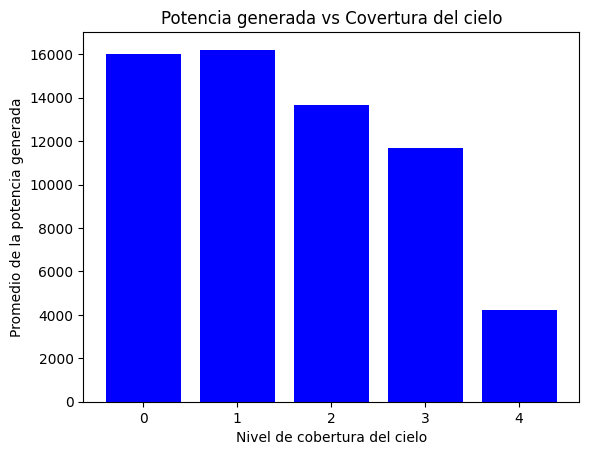

In [29]:
fig, ax = plt.subplots()
ax.bar(potSkyCover['Sky Cover'], potSkyCover['Power Generated'], color = "blue")
plt.title("Potencia generada vs Covertura del cielo")
plt.xlabel("Nivel de cobertura del cielo")
plt.ylabel("Promedio de la potencia generada")
plt.show()

#Sección 4.
##Por último un heatmap de todas las variables del dataset.

##Gráfico 9
####Gráfico para evaluar la relación entre las variables, se puede ver que no hay relación entre ellas mas que las dos de viento, lo cual era esperable pero no útil.

<ipython-input-30-0bf4df19828b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_mod.corr(), annot=True)


<Axes: >

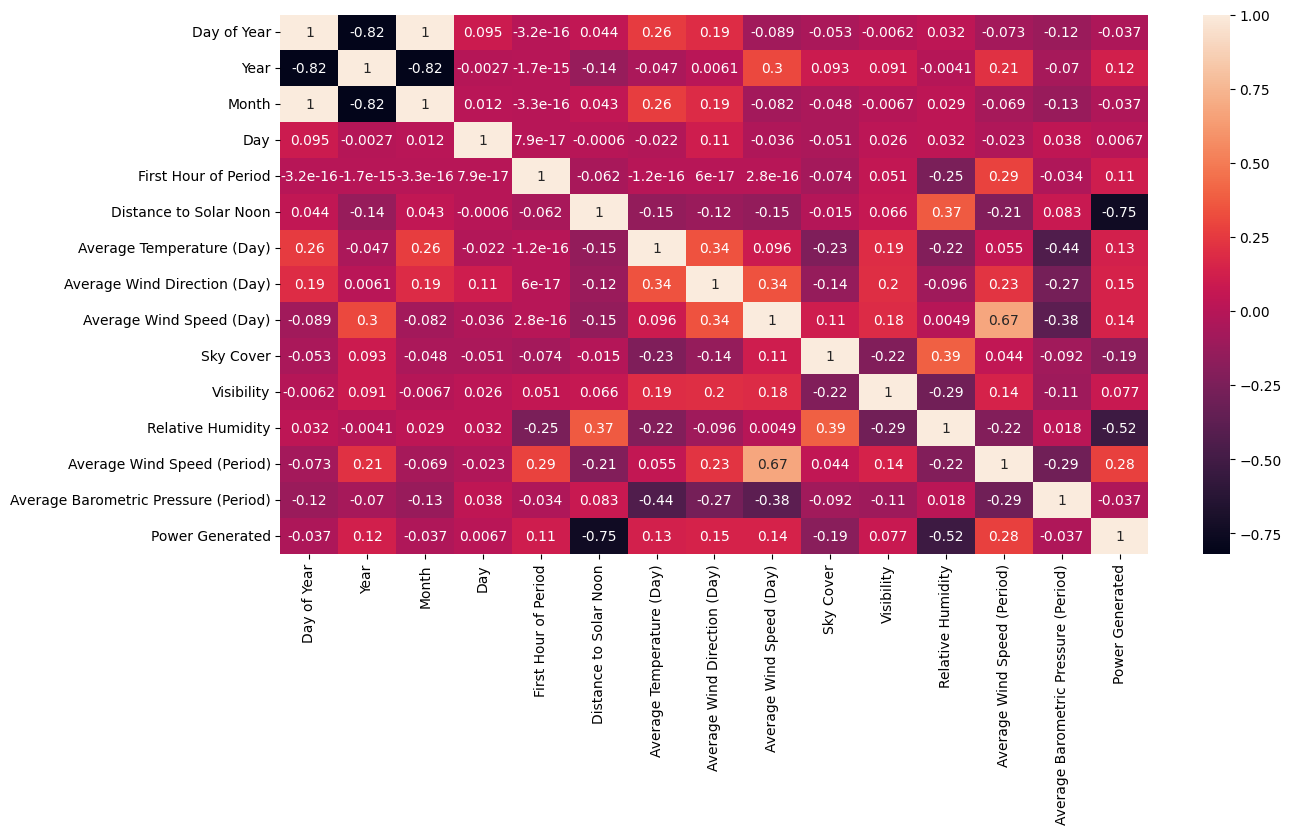

In [30]:
plt.figure(figsize=(14,7))
sns.heatmap(df_mod.corr(), annot=True)

#Seccion 5.

Separamos las variables dependientes e independientes

In [31]:
x = df_NaN.drop(["Power Generated"], axis=1)
y = df_NaN['Power Generated']

Separo el dataset en train, validation y test.

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [35]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.30)

Normalizamos el dataset para que quede entre -1 y 1 y asi poder entrenar correctamente con el modelo.

In [36]:
from sklearn.preprocessing import StandardScaler
StSc = StandardScaler()
StSc.fit(x_train)
normalized_x_train = StSc.transform(x_train)
normalized_x_validation = StSc.transform(x_validation)
normalized_x_test = StSc.transform(x_test)
normalized_x_train

array([[ 1.78910545, -1.51342036,  1.66781087, ...,  0.74787154,
        -1.4583588 ,  2.22188473],
       [ 0.71770385, -1.51342036,  0.75633678, ...,  0.28314081,
        -1.07948184, -1.04006992],
       [-1.71279053,  0.66075496, -1.67426078, ...,  0.0175804 ,
        -0.1954356 ,  3.64012588],
       ...,
       [ 0.43993306,  0.66075496,  0.45251209, ..., -1.04466126,
         1.19377992, -0.75642169],
       [-1.67310899,  0.66075496, -1.67426078, ...,  0.61509133,
        -0.70060488,  1.08729181],
       [-1.06796549,  0.66075496, -1.06661139, ...,  0.21675071,
        -0.1954356 ,  1.72550033]])

Elegimos el modelo RandomForestRegression y utilizamos el RandomizedSearchCV para entrenar el modelo y buscar los mejores hiperparametros

In [37]:
from sklearn.model_selection import RandomizedSearchCV
regressor = RandomForestRegressor(random_state = 0)

In [38]:
hyper_parameters ={
    'n_estimators': [1,10,50,100,150],
    'max_depth': [1,10,50,100],
    'min_samples_split': [1,5,10,15,20],
    'min_samples_leaf': [0.1,0.5,1,5,10],
    'max_features': ["sqrt","log2",1,5,10],
}

In [39]:
rs = RandomizedSearchCV(regressor, hyper_parameters, verbose = 4, random_state = 0, n_iter = 100, scoring = 'neg_mean_absolute_error')
rs.fit(normalized_x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=100, max_features=10, min_samples_leaf=0.1, min_samples_split=15, n_estimators=10;, score=-3862.442 total time=   0.0s
[CV 2/5] END max_depth=100, max_features=10, min_samples_leaf=0.1, min_samples_split=15, n_estimators=10;, score=-4288.519 to

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=100,
                   param_distributions={'max_depth': [1, 10, 50, 100],
                                        'max_features': ['sqrt', 'log2', 1, 5,
                                                         10],
                                        'min_samples_leaf': [0.1, 0.5, 1, 5,
                                                             10],
                                        'min_samples_split': [1, 5, 10, 15, 20],
                                        'n_estimators': [1, 10, 50, 100, 150]},
                   random_state=0, scoring='neg_mean_absolute_error',
                   verbose=4)

Observo cuales son los mejores hiperparametros

In [40]:
rs.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 10,
 'max_depth': 100}

Uso predict para obtener la prediccion

In [41]:
predict_rs = rs.predict(normalized_x_train)
predict_rs

array([13360.07983564, 14569.96158176, 15759.7850477 ,  1992.83010272,
        5323.98715163, 26058.95421573,  1731.37309853,  4134.6212734 ,
        4342.28369495,  1550.56160002, 19403.84803152, 33521.38338448,
        1987.03962211,  1944.65790357,  5682.56163561,  1748.15794891,
        1961.30866685,  6549.32254917,  1297.56391969,  4602.9583184 ,
       13869.79646056,  6972.94146288, 17998.39254929, 16094.90134473,
        5812.07684835, 19978.94154987,   615.97608449,  1437.81606275,
        1404.45727629, 17291.79286761, 17341.25668104, 33343.9150603 ,
        2686.34999795, 21411.30508961, 20215.14431048,   617.53934392,
         750.91999186, 21328.89337525, 18201.75704561, 27293.89742589,
       33423.71047315,  3918.56406127, 10182.07544822, 19909.79542669,
       14107.84114688, 20960.78143141,   385.65209096, 19807.70187823,
         850.13801681,   913.42973827,  4450.75565583,  4053.07363357,
       16874.19424128,  1212.95591761, 20184.82891097,  2250.7220037 ,
      

Busco los nombres de las metricas para luego utilizar

In [42]:
metrics_names = get_scorer_names()
metrics_names

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

Elegimos trabajar con la metrica de error absoluto medio y lugo el error cuadrático medio

In [43]:
mean_absolute_error(y_train, predict_rs)

1602.720220356963

In [44]:
mean_squared_error(y_train, predict_rs)

5875009.008263374

Ahora probamos con los datos de validation

In [45]:
predict_validation = rs.predict(normalized_x_validation)
predict_validation

array([ 1771.90667055, 31957.54495865, 15129.58546432, 33917.99742558,
       20867.98594273,  8883.25985377, 33117.10247694,  6468.72612677,
         636.97318293, 20044.01683253,  1506.18923002, 34020.41945437,
       20287.95807821, 33969.26649077,  1736.48594162, 20785.37905902,
        5770.04917612, 13778.61272031, 17217.29623453, 14545.116256  ,
         791.69701662, 10598.17696328,  4162.22991616,  4124.16091986,
         892.67987928, 19550.01050821, 30067.93480379, 32791.58297597,
        3813.89661922,   313.05963059,  4181.78734578,  1765.09942288,
       15902.2068363 , 19061.04152759, 15987.14209058, 13618.40114862,
       29814.72297436, 31074.31637856,   956.42963253,  4482.02543019,
       20061.90026871,  1724.32401784, 23384.57908959,   635.64048015,
        1348.47240568,  8389.12364865,   324.91381712, 22481.39274289,
         964.93045174,  6170.48967717, 15676.85429963, 23313.83184096,
         615.05942512,  5606.04064876, 21315.59487515, 19242.91009798,
      

In [46]:
mean_absolute_error(y_validation, predict_validation)

2388.4078312093766

In [47]:
mean_squared_error(y_validation, predict_validation)

13676077.093414465

Ahora probamos con los datos de Test

In [48]:
predict_test = rs.predict(normalized_x_test)
predict_test

array([ 5866.34932951,  5211.23757373, 11251.36621143, 16760.79744507,
       18679.77390315,   787.47607519, 22862.71389916, 17284.46762263,
       18102.49401771, 34254.73737256, 20704.79945275,  1721.67090895,
        9676.52419499,  7901.72308489,  9046.92512354, 31766.96967269,
       28801.72207699, 15651.64779284, 26151.52699691,  1502.52589781,
       32781.09453116,  7535.75502651,  1147.99614234, 25814.74984078,
        5703.10545485,  4280.15270767,  2612.4796185 , 19435.63218263,
         846.16779826, 25041.01458417,   535.35577114, 29357.55390091,
        6176.18600728,  7045.29744548,   580.56955817,  2593.57117451,
        4665.82983091, 14608.98466464,   674.03551619, 25086.92578308,
       30145.1479978 ,  1853.97541775, 25292.26346097, 14898.4170019 ,
        1729.35486831, 21392.79963888, 25503.31882531, 11065.79036922,
       20502.03931073,  2431.56612907, 32188.27397117,  1635.11114419,
        1414.56239958,  2696.40945459, 27210.34776608, 12130.05429125,
      

In [49]:
mean_absolute_error(y_test, predict_test)

2288.308533564991

In [50]:
mean_squared_error(y_test, predict_test)

12532549.755528634

#Sección 5.
##Insights

####En la sección 1 podemos observar que la generacion de potencia aumenta durante los meses de verano, lo que es coherente con potencia generada con que dicha potencia sea generada con paneles fotovoltaicos y al mismo tiempo coincide con el gráfico de distancia al mediodia solar.
####En el gráfico 6, esta la relación entre la potencia generada y la temperatura y se puede observar como a medida que aumenta la temperatura tambien aumenta la potencia. Esto es acorde a que a mayor radiacion solar, mayor va a ser la temperatura y tambien la potencia generada por los paneles.
####En ese mismo gráfico, se aprecia que tiene tres picos en los que la potencia se reduce significativamente al aumentar la temperatura, algo que es contrario a la tendencia general que observamos antes. Esto es posible que se deba a que los paneles solares son suceptibles a las altas temperaturas, lo que los hace funcionar con un menor rendimiento, por ello se puede deducir que en esa franja de temperatura no hay una tecnologia desarrollada, sin embargo si la hay para temperaturas mayores y menores.
####En la sección 3 podemos observar que a menor nubosidad mayor es la potencia promedio generada, lo que es un tendencia coherente con lo esperado.